

-- EXAMEN - APRENDIZAJE SUPERVISADO 28/05/25 --

--NURY MARGOT QUISPE CCALLO - 217120 --



Paso 1: IMPORTAMOS LIBRERIAS

In [ ]:
# BLOQUE 1: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


paso 2.  CARGAMOS LA BASE DE DATOS

In [ ]:
# BLOQUE 2: Cargar el dataset
df = pd.read_csv('winequality-red.csv', sep=';')
print("Primeras filas del dataset:")
display(df.head())


Primeras filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Paso 3: LIMPIEZA DE DATOS

In [ ]:
# BLOQUE 3: Limpieza de datos
print("¿Hay valores nulos?")
print(df.isnull().sum())

print("\nTipos de datos:")
print(df.dtypes)


¿Hay valores nulos?
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Tipos de datos:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


 Paso 4: ANÁLIS DE CORRELACÓN

 *Usamos Para identificar  las variables clave que estan  afectando  directamente la calidad.

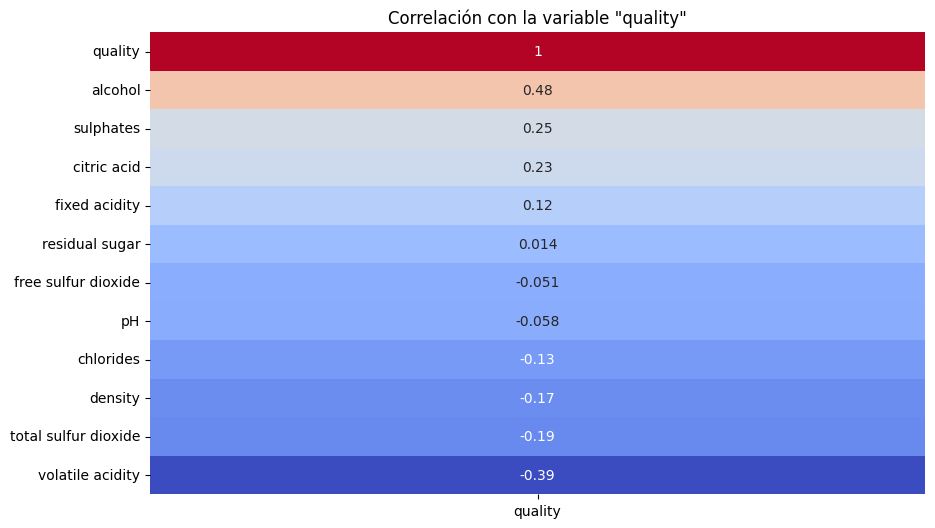

Top 5 variables seleccionadas: ['alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'density']


In [ ]:
# BLOQUE 4: Análisis de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['quality']].sort_values(by='quality', ascending=False),
            annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlación con la variable "quality"')
plt.show()

top_features = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'density']
print("Top 5 variables seleccionadas:", top_features)


Paso 5: División del dataset
Para separar datos en entrenamiento y prueba y evaluar modelos.

In [ ]:
# BLOQUE 5: División del dataset
X_all = df.drop(columns='quality')
X_sel = df[top_features]
y = df['quality']

X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
X_train_sel, X_test_sel, _, _ = train_test_split(X_sel, y, test_size=0.2, random_state=42)


 Paso 6: ENTRENAMIENTO CON VARIABLES SELECCIONADAS


In [ ]:
# BLOQUE 6: Entrenamiento con variables seleccionadas
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))


Paso 7: RESULTADOS CON VARIABLES SELECCIONADAS

In [ ]:
# BLOQUE 7: Resultados con variables seleccionadas
results_df = pd.DataFrame(results, columns=['Modelo', 'RMSE', 'R2'])
results_df = results_df.sort_values(by='R2', ascending=False)
print(" Resultados con variables seleccionadas:")
display(results_df)


 Resultados con variables seleccionadas:


,Modelo,RMSE,R2
3,Random Forest,0.583757,0.478547
0,Linear Regression,0.632927,0.387004
1,Ridge Regression,0.633401,0.386086
4,KNN Regressor,0.642942,0.367450
2,Lasso Regression,0.810654,-0.005592


 Paso 8: EVALUACION CON TODAS LAS VARIABLES

In [ ]:
# BLOQUE 8: Evaluación con todas las variables
results_all = []

for name, model in models.items():
    model.fit(X_train_all, y_train)
    y_pred = model.predict(X_test_all)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results_all.append((name, rmse, r2))

results_df_all = pd.DataFrame(results_all, columns=['Modelo', 'RMSE', 'R2'])
results_df_all = results_df_all.sort_values(by='R2', ascending=False)
print("Resultados con TODAS las variables:")
display(results_df_all)


Resultados con TODAS las variables:


,Modelo,RMSE,R2
3,Random Forest,0.548852,0.539043
0,Linear Regression,0.624520,0.403180
1,Ridge Regression,0.626856,0.398706
4,KNN Regressor,0.729383,0.185929
2,Lasso Regression,0.804745,0.009015


Paso 9 CONCLUSION DEL MEJOR VARIABLE

In [ ]:
# BLOQUE 9: Elegir el mejor modelo con todas las variables
mejor_modelo_all = results_df_all.iloc[0]
print("Mejor modelo con TODAS las variables:")
print(f"Modelo: {mejor_modelo_all['Modelo']}")
print(f"RMSE: {mejor_modelo_all['RMSE']:.4f}")
print(f"R2: {mejor_modelo_all['R2']:.4f}")


Mejor modelo con TODAS las variables:
Modelo: Random Forest
RMSE: 0.5489
R2: 0.5390
